# 🔍 SCGE Model Visualization Notebook

This notebook visualizes the results of a simple Spatial Computable General Equilibrium (SCGE) model solved using GAMSPy.

## 📚 Contents

1. [Overview](#overview)
2. [Mathematical Model](#model)
3. [Data Import](#import)
4. [Visualization](#visualization)
5. [Scenario Comparison (Optional)](#scenario)
6. [Conclusion](#conclusion)

## 📖 Overview <a name="overview"></a>

The SCGE model considers two regions (`A` and `B`) where:
- Households maximize utility through consumption from both regions
- Firms produce goods using capital and labor
- Labor is immobile across regions; capital is mobile
- Transport costs are present for interregional trade
- The model finds an optimal allocation of capital that maximizes utility

This notebook plots the outputs from the optimization results.

## 📐 Mathematical Model <a name="model"></a>

### Production Function (Cobb-Douglas):
$$
Y_i = A_i \cdot L_i^{\alpha} \cdot K_i^{1 - \alpha}
$$

- $Y_i$: Output in region $i$
- $L_i$: Labor in region $i$ (fixed)
- $K_i$: Capital allocated to region $i$
- $\alpha$: Labor share parameter (e.g., 0.3)

### Utility Function (CES):
$$
U = ( C_A^{\rho} + C_B^{\rho} )^{1/\rho}
$$

- $C_A, C_B$: Consumption of goods from region A and B
- $\rho$: Elasticity parameter

### Capital Constraint:
$$
K_A + K_B = \bar{K}
$$

I solve the model using GAMSPy and extract variables of interest for visualization.

In [35]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Configure plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [37]:
# Import data <a name="import"></a>
# Read result files
df = pd.read_csv("../results/outputs.csv")
summary = pd.read_csv("../results/summary.csv")

display(df)
display(summary)

,region,Y,K
0,A,54.677464,84.139337
1,B,103.676947,115.860663


,U,Z
0,308.937179,308.937179


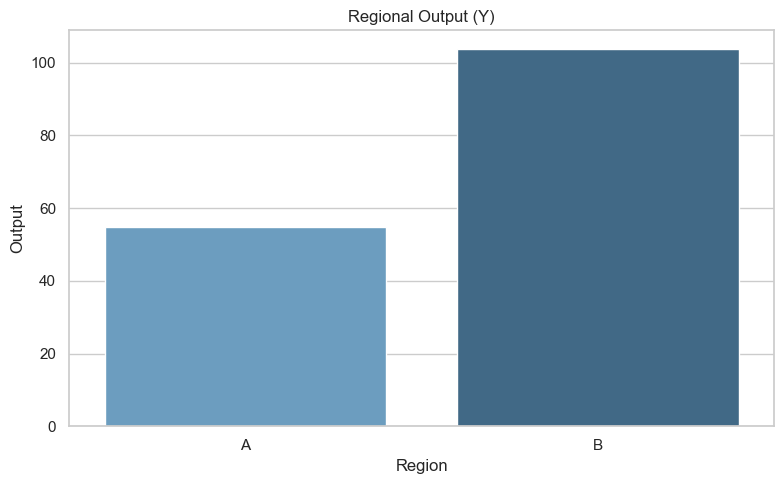

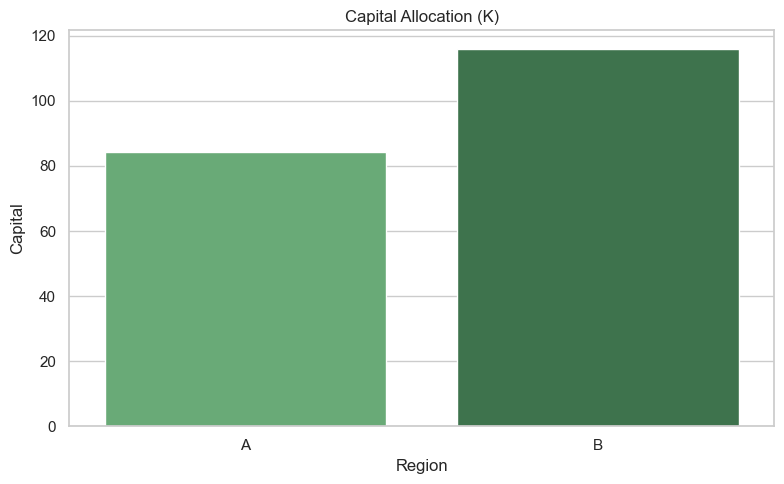

In [38]:
# Visualization <a name="visualization"></a>
# Production by region
plt.figure()
sns.barplot(data=df, x="region", y="Y", hue="region",palette="Blues_d", legend=False)
plt.title("Regional Output (Y)")
plt.xlabel("Region")
plt.ylabel("Output")
plt.tight_layout()
plt.show()

# Capital allocation
plt.figure()
sns.barplot(data=df, x="region", y="K", hue="region", palette="Greens_d", legend=False)
plt.title("Capital Allocation (K)")
plt.xlabel("Region")
plt.ylabel("Capital")
plt.tight_layout()
plt.show()

In [39]:
# Print utility values
U_val = summary.loc[0, "U"]
Z_val = summary.loc[0, "Z"]

print(f"Utility (U): {U_val}")
print(f"Objective value (Z): {Z_val}")

Utility (U): 308.937179136549
Objective value (Z): 308.937179136549


<a name="conclusion"></a>
## ✅ Conclusion

This notebook provided a simple yet powerful way to visualize the results of a basic SCGE model. You can expand this framework by:

- Adding more regions or sectors
- Introducing policy scenarios (e.g. carbon tax, subsidies)
- Visualizing more variables (wages, consumption, welfare)

I hope this helps you communicate the insights of spatial economic modeling effectively!